# Pymaceuticals Inc.
---

### Analysis

- One observation we get from analyzing the trial data is that there is a positive correlation between mouse weight and tumor volume i.e. larger tumor volume is correlated with higher weight and vice versa.
- Another observation is that the Capomulin treatment did decrease the tumor volume of mouse l509, however it was a relatively small decrease and did not eliminate the tumor completely (volume only decreased from 45 to 40 mm3).
- A final observation is that Ketapril had the highest mean tumor volume meaning that it could be the least effective treatment for reducing tumor volume.
 

In [123]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how="left")

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [124]:
# Checking the number of mice.
len(combined_df.loc[combined_df["Timepoint"] == 0, "Mouse ID"]) - 1

249

In [125]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()

array(['g989'], dtype=object)

In [126]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [127]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_df.drop_duplicates(inplace=True)
print(combined_df.loc[combined_df["Mouse ID"] == "g989"])
combined_df.head()

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294                 1     Propriva   
1592     g989         35           62.570880        

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [128]:
# Checking the number of mice in the clean DataFrame.
len(combined_df.loc[combined_df["Timepoint"] == 0, "Mouse ID"]) - 1

248

## Summary Statistics

In [129]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame(
    {
        "Mean Tumor Volume": mean, 
        "Median Tumor Volume": median, 
        "Tumor Volume Variance": variance, 
        "Tumor Volume Std. Dev.": std, 
        "Tumor Volims Std. Err.": sem
    }
)
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volims Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [130]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_agg


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

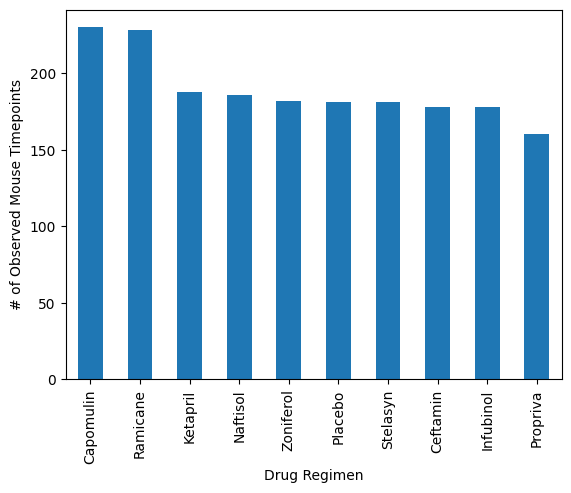

In [131]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = combined_df.groupby("Drug Regimen").size()
regimen_counts = regimen_counts.sort_values(ascending = False)
regimen_counts.plot(kind = "bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

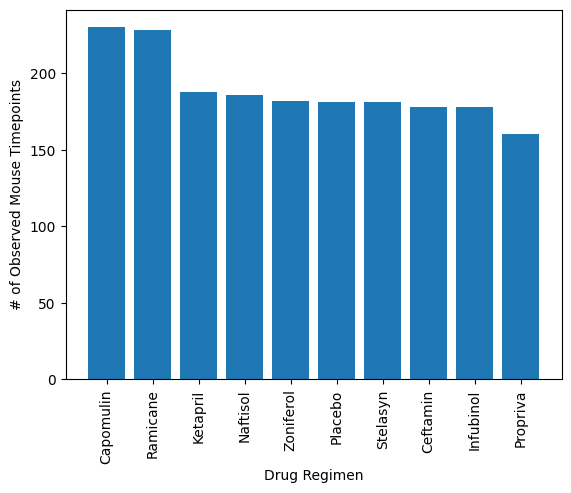

In [132]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = combined_df.groupby("Drug Regimen").size()
regimen_counts = regimen_counts.sort_values(ascending = False)
regimens = regimen_counts.index
counts = regimen_counts.values

plt.bar(regimens, counts)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

<Axes: >

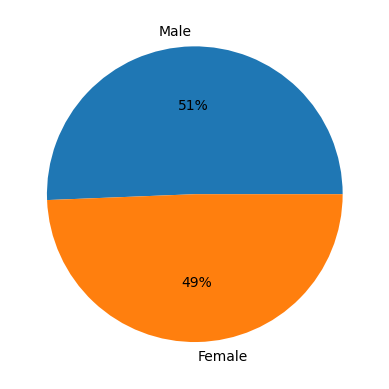

In [133]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = combined_df.groupby("Sex").size()
sex_counts = sex_counts.sort_values(ascending = False)
sex_counts.plot(kind = "pie", y="Female", autopct="%.0f%%")

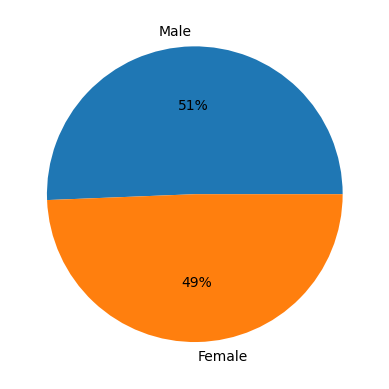

In [134]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = combined_df.groupby("Sex").size()
sex_counts = sex_counts.sort_values(ascending = False)

plt.pie(sex_counts, labels=("Male", "Female"), autopct="%.0f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [135]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
group_df = combined_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
group_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(combined_df, group_df, on=["Mouse ID", "Timepoint"])
merged_df["Drug Regimen"].unique()
merged_df.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.0,0,Ketapril,Male,15,29
1,x336,0,45.0,0,Naftisol,Female,4,29
2,h428,0,45.0,0,Ketapril,Female,1,27
3,v199,0,45.0,0,Naftisol,Female,17,29
4,o848,0,45.0,0,Stelasyn,Female,14,27
5,d133,0,45.0,0,Zoniferol,Male,5,30
6,l872,0,45.0,0,Placebo,Male,19,30
7,u153,0,45.0,0,Ceftamin,Female,11,25
8,b447,0,45.0,0,Ceftamin,Male,2,30
9,n482,0,45.0,0,Propriva,Female,4,29


In [136]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# create empty df to store outliers
outliers_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes

    # filter only relevant treatments
    treatment_df = merged_df.loc[merged_df["Drug Regimen"] == treatment, :]
    # get volumes for each of these treatments (already max bc of previous merge)
    volumes = treatment_df["Tumor Volume (mm3)"]
    # add the volumes to the list
    tumor_vol.append(volumes)
    
    # make quartiles
    quartiles = volumes.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = treatment_df.loc[(treatment_df["Tumor Volume (mm3)"] < lower_bound) | (treatment_df["Tumor Volume (mm3)"] > upper_bound)]
    outliers_list.append(outliers)

# print outliers
for i in range(len(treatments)):
    print(f"{treatments[i]}'s potential outliers:")
    print(outliers_list[i])
    print()

Capomulin's potential outliers:
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []

Ramicane's potential outliers:
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []

Infubinol's potential outliers:
   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
20     c326          5           36.321346                 0    Infubinol   

       Sex  Age_months  Weight (g)  
20  Female          18          25  

Ceftamin's potential outliers:
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []



C:\Users\djt1414\AppData\Local\Temp\ipykernel_19616\2323466543.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(treatments)


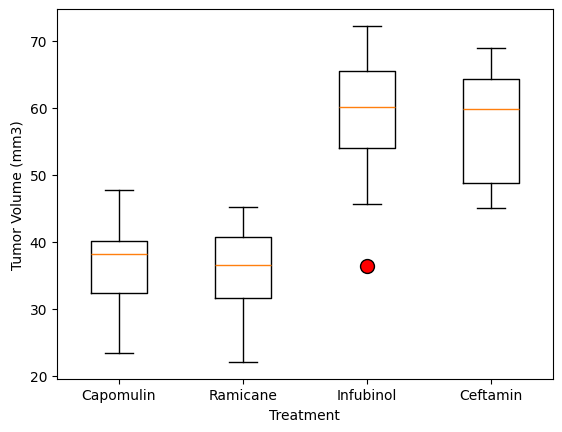

In [137]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig, ax = plt.subplots()
ax.set_xticklabels(treatments)
boxplot = ax.boxplot(tumor_vol)
ax.set_xlabel("Treatment")
ax.set_ylabel("Tumor Volume (mm3)")

for flier in boxplot["fliers"]:
    flier.set(markerfacecolor="red", markersize="10")

plt.show()

## Line and Scatter Plots

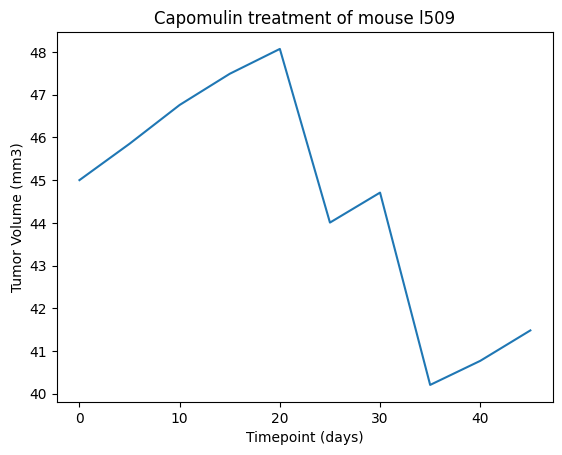

In [138]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_data = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"]
l509_data = capomulin_data.loc[capomulin_data["Mouse ID"] == "l509"]

time_points = l509_data["Timepoint"]
tumor_volume = l509_data["Tumor Volume (mm3)"]

plt.plot(time_points, tumor_volume)

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.title(f"Capomulin treatment of mouse l509")

plt.show()


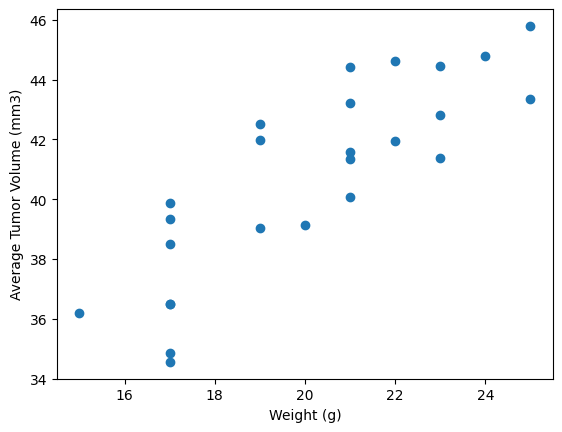

In [139]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"]

capomulin_vol = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
capomulin_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

plt.scatter(capomulin_weight, capomulin_vol.values)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


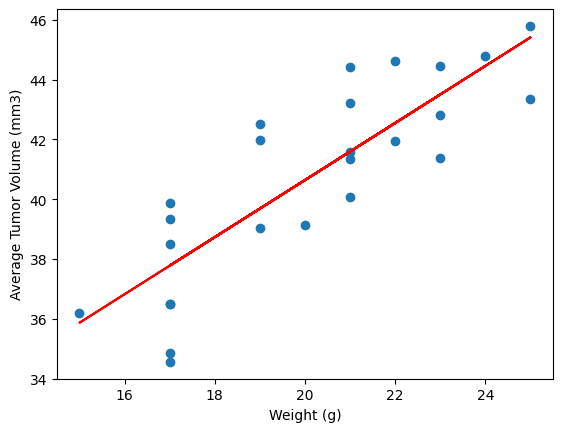

In [140]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation_coefficient = st.pearsonr(capomulin_weight, capomulin_vol)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_weight, capomulin_vol)
regress_values = capomulin_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(capomulin_weight,capomulin_vol)
plt.plot(capomulin_weight,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation_coefficient[0],2)}")
plt.show()
